Dataset used:
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872


Implementation based on paper:
Chen, Y. (2025). Contextual bandits to increase user prediction accuracy in movie recommendation system. ITM Web of Conferences, 73, 01018. https://doi.org/10.1051/itmconf/20257301018

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## STEP 1: PREPROCESSING DATA & EXTRACTING USER-MOVIE-FEATURES

In [2]:
import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/AI Planning/u.data", sep="\t", header=None)

data_dir = 'dataset/u.data'

df = pd.read_csv(data_dir, sep="\t", header=None)

df.columns=['user_id', 'item_id', 'rating', 'timestamp']
df.drop('timestamp', axis=1, inplace=True)
df.sort_values(['user_id'], ignore_index=True, inplace=True)
df.head()

,user_id,item_id,rating
0,1,46,4
1,1,257,4
2,1,12,5
3,1,74,1
4,1,134,4


In [3]:
# user = pd.read_csv("/content/drive/MyDrive/AI Planning/u.user", sep="|", header=None)
user_data_dir = 'dataset/u.user'

user = pd.read_csv(user_data_dir, sep="|", header=None)

user.columns=['user_id', 'age', 'gender', 'occupation','zip code']
user.drop('zip code', axis=1, inplace=True)
user.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(user[['gender', 'occupation']])
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'occupation']))
encoded_data.head()

user = pd.concat([user, encoded_data], ignore_index=False, sort=False, axis=1)
user.drop(['gender', 'occupation'], axis=1, inplace=True)
user.head()

,user_id,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
user['age'] = minmax.fit_transform(user[['age']])

user.head()

,user_id,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,0.257576,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.696970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.242424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.257576,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.393939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# movie = pd.read_csv("/content/drive/MyDrive/AI Planning/u.item", sep='|', header=None, encoding='latin-1')
movie = pd.read_csv('dataset/u.item', sep='|', header=None, encoding='latin-1')

movie.columns=['item_id', 'movie_title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
               'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']

movie.drop(['movie_title', 'release date', 'video release date', 'IMDb URL'], axis=1, inplace=True)

print(len(movie.columns))
print(movie.columns)

20
Index(['item_id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


## STEP 3: CLUSTER MOVIES

Why? To reduce the number of arms therefore limiting the exploration space. Also helps with generalization.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=5)
movie_clusters = kmeans.fit_predict(movie.drop(['item_id'], axis=1))

movie['cluster'] = movie_clusters

## STEP 2: BUILDING & TRAINING THE LINUCB MODEL

In [8]:
# Implementation assisted by ChatGPT

import numpy as np

class LinUCB:
  def __init__(self, n_arms, context_dim, alpha):
    self.n_arms = n_arms
    self.context_dim = context_dim
    self.alpha = alpha
    self.A = [np.identity(context_dim) for arm in range(n_arms)]
    self.b = [np.zeros(context_dim) for arm in range(n_arms)]

  def score(self, arm, x):
        A_inv = np.linalg.inv(self.A[arm])
        theta = A_inv @ self.b[arm]
        score = np.transpose(theta) @ x + self.alpha * np.sqrt(np.transpose(x) @ A_inv @ x)
        return score

  def select_arm(self, x):
    p_vals = []
    for i in range(self.n_arms):
        p = self.score(i, x)
        p_vals.append(p)
    return np.argmax(p_vals)

  def update(self, arm_idx, x, r):
    self.A[arm_idx] += np.outer(x, x)
    self.b[arm_idx] += r * x

In [9]:
# Implementation assisted by ChatGPT

class ContextualEpsilonGreedy:
    def __init__(self, n_arms, context_dim, epsilon):
        self.n_arms = n_arms
        self.context_dim = context_dim
        self.epsilon = epsilon
        self.A = [np.identity(context_dim) for _ in range(n_arms)]
        self.b = [np.zeros(context_dim) for _ in range(n_arms)]

    def score(self, arm, x):
        A_inv = np.linalg.inv(self.A[arm])
        theta = A_inv @ self.b[arm]
        return np.transpose(theta) @ x

    def select_arm(self, x):
        if np.random.rand() < self.epsilon:
            # Explore randomly
            random_arm = np.random.randint(self.n_arms)
            scores = self.score(random_arm, x)
            return scores
        else:
            # Exploit best arm
            scores = [self.score(i, x) for i in range(self.n_arms)]
            return np.argmax(scores)

    def update(self, arm_idx, x, r):
        self.A[arm_idx] += np.outer(x, x)
        self.b[arm_idx] += r * x


In [10]:
n_training = int(df.shape[0]*0.9)

training_df = df.iloc[:n_training]
testing_df = df.iloc[n_training:]

from sklearn.utils import shuffle
training_df = shuffle(training_df)
training_df.reset_index(drop=True, inplace=True)

testing_df = shuffle(testing_df)
testing_df.reset_index(drop=True, inplace=True)

Training LinUCB and e-Greedy model

In [11]:
num_arms = len(movie['cluster'].unique())

context_dim = user.shape[1]+movie.shape[1]-3

linucb = LinUCB(num_arms, context_dim, 0.5)
cb_e_greedy = ContextualEpsilonGreedy(num_arms, context_dim, 0.1)

for idx, row in training_df.iterrows():
  user_id = row['user_id']
  item_id = row['item_id']

  user_features = user.loc[user['user_id'] == user_id]
  user_features = user_features.drop('user_id', axis=1)

  movie_row = movie.loc[movie['item_id'] == item_id]
  movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

  context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

  reward = row['rating']/5

  cluster = movie_row["cluster"].values[0]

  linucb.update(cluster, context, reward)
  cb_e_greedy.update(cluster, context, reward)

## Testing

Because we want to simulate a cold start problem, we assume that the testing data for new users only contain the user's age, occupation, and genre.

In [12]:
def dcg(relevances):
    return sum([(2**rel - 1) / np.log2(idx + 2) for idx, rel in enumerate(relevances)])

def ndcg_at_k(true_relevance, predicted_scores, k=10):
    idx_sorted = np.argsort(predicted_scores)[::-1][:k]
    relevances = [true_relevance[i] for i in idx_sorted]
    ideal_relevances = sorted(true_relevance, reverse=True)[:k]
    return dcg(relevances) / dcg(ideal_relevances) if dcg(ideal_relevances) > 0 else 0

In [13]:
# ndcg_scores = []

# for idx, row in testing_df.iterrows():
#     user_id = row['user_id']
#     true_rating = row['rating']/5
#     true_movie = row['item_id']

#     user_features = user.loc[user['user_id'] == user_id]
#     user_features = user_features.drop('user_id', axis=1)

#     movie_row = movie.loc[movie['item_id'] == true_movie]
#     movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

#     context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

#     true_cluster = movie_row["cluster"].values[0]

#     predicted_scores = []
#     true_relevance = []

#     for arm_idx in range(linucb.n_arms):
#         score = linucb.score(arm_idx, context)
#         predicted_scores.append(score)
#         true_relevance.append(1 if arm_idx == true_cluster else 0)

#     ndcg = ndcg_at_k(true_relevance, predicted_scores, k=10)
#     ndcg_scores.append(ndcg)

# print(f"Average NDCG@10: {np.mean(ndcg_scores):.4f}")

In [14]:
# ndcg_scores = []

# for idx, row in testing_df.iterrows():
#     user_id = row['user_id']
#     true_rating = row['rating']/5
#     true_movie = row['item_id']

#     user_features = user.loc[user['user_id'] == user_id]
#     user_features = user_features.drop('user_id', axis=1)

#     movie_row = movie.loc[movie['item_id'] == true_movie]
#     movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

#     context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

#     true_cluster = movie_row["cluster"].values[0]

#     predicted_scores = []
#     true_relevance = []

#     for arm_idx in range(linucb.n_arms):
#         score = cb_e_greedy.score(arm_idx, context)
#         predicted_scores.append(score)
#         true_relevance.append(1 if arm_idx == true_cluster else 0)

#     ndcg = ndcg_at_k(true_relevance, predicted_scores, k=10)
#     ndcg_scores.append(ndcg)

# print(f"Average NDCG@10: {np.mean(ndcg_scores):.4f}")

In [15]:
# Calculate NDCG for any model
def calculate_ndcg(row, model, k=10):
    user_id = row.user_id
    true_movie = row.item_id
    true_rating = row.rating

    user_features = user.loc[user['user_id'] == user_id]
    user_features = user_features.drop('user_id', axis=1)

    movie_row = movie.loc[movie['item_id'] == true_movie]
    movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

    context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

    true_cluster = movie_row["cluster"].values[0]

    predicted_scores = []
    true_relevance = []

    for arm_idx in range(model.n_arms):
        score = model.score(arm_idx, context)
        predicted_scores.append(score)
        true_relevance.append(1 if arm_idx == true_cluster else 0)

    ndcg = ndcg_at_k(true_relevance, predicted_scores, k)
    return ndcg

Testing and printin NDCG for LinUCB and e-Greedy model

In [16]:
from tqdm import tqdm
from joblib import Parallel, delayed
import numpy as np

k_list = [5,10,15,20,25,30,35,40,45,50]
results_linucb_list = []
results_cb_egreedy_list = []

for k in k_list:
    print(f'Testing with K value of: {k}')

    # Parallel execution with progress bar
    results_linucb = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB NDCG"))
    results_cb_egreedy = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, cb_e_greedy, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="e-Greedy NDCG"))

    results_linucb_mean = np.mean(results_linucb)
    results_cb_egreedy_mean = np.mean(results_cb_egreedy)

    print(f"LinUCB Average NDCG@{k}: {results_linucb_mean:.4f}")
    print(f"e-Greedy Average NDCG@{k}: {results_cb_egreedy_mean:.4f}")

    results_linucb_list.append(results_linucb_mean)
    results_cb_egreedy_list.append(results_cb_egreedy_mean)
    print()

print(results_linucb_list)
print(results_cb_egreedy_list)

Testing with K value of: 5


LinUCB NDCG:   0%|          | 0/10000 [00:00<?, ?it/s]

e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 4866.19it/s]


LinUCB Average NDCG@5: 0.0021
e-Greedy Average NDCG@5: 0.7253

Testing with K value of: 10


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3891.37it/s]


LinUCB Average NDCG@10: 0.0182
e-Greedy Average NDCG@10: 0.7296

Testing with K value of: 15


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3879.89it/s]


LinUCB Average NDCG@15: 0.1245
e-Greedy Average NDCG@15: 0.7296

Testing with K value of: 20


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:03<00:00, 3043.41it/s]


LinUCB Average NDCG@20: 0.2498
e-Greedy Average NDCG@20: 0.7296

Testing with K value of: 25


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:03<00:00, 2949.16it/s]


LinUCB Average NDCG@25: 0.2498
e-Greedy Average NDCG@25: 0.7296

Testing with K value of: 30


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:03<00:00, 3083.85it/s]


LinUCB Average NDCG@30: 0.2498
e-Greedy Average NDCG@30: 0.7296

Testing with K value of: 35


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3596.68it/s]


LinUCB Average NDCG@35: 0.2498
e-Greedy Average NDCG@35: 0.7296

Testing with K value of: 40


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3595.13it/s]


LinUCB Average NDCG@40: 0.2498
e-Greedy Average NDCG@40: 0.7296

Testing with K value of: 45


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3365.68it/s]


LinUCB Average NDCG@45: 0.2498
e-Greedy Average NDCG@45: 0.7296

Testing with K value of: 50


e-Greedy NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3982.41it/s]


LinUCB Average NDCG@50: 0.2498
e-Greedy Average NDCG@50: 0.7296

[np.float64(0.002117173162433747), np.float64(0.01817141067276879), np.float64(0.12449519437883048), np.float64(0.24982481300879217), np.float64(0.24982481300879217), np.float64(0.24982481300879217), np.float64(0.24982481300879217), np.float64(0.24982481300879217), np.float64(0.24982481300879217), np.float64(0.24982481300879217)]
[np.float64(0.7252926992598855), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003), np.float64(0.7296461349622003)]


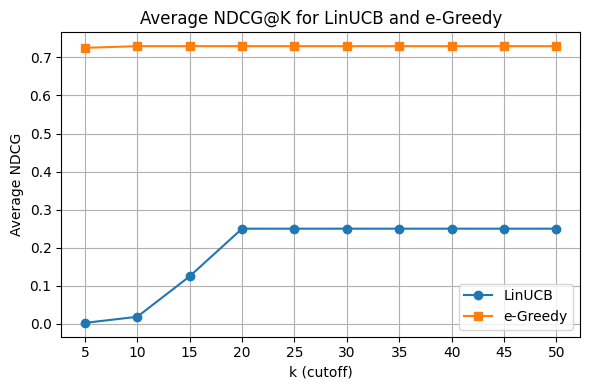

In [17]:
import matplotlib.pyplot as plt

# === Plotting ===
plt.figure(figsize=(6, 4))
plt.plot(k_list, results_linucb_list, marker='o', label='LinUCB')
plt.plot(k_list, results_cb_egreedy_list, marker='s', label='e-Greedy')
plt.title('Average NDCG@K for LinUCB and e-Greedy')
plt.xlabel('k (cutoff)')
plt.ylabel('Average NDCG')
plt.xticks(k_list)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Training new LinUCB model with alpha 0.1

In [18]:

num_arms = len(movie['cluster'].unique())

context_dim = user.shape[1]+movie.shape[1]-3

linucb_a1 = LinUCB(num_arms, context_dim, 0.1)
linucb_a05 = LinUCB(num_arms, context_dim, 0.05)
linucb_a01 = LinUCB(num_arms, context_dim, 0.01)
linucb_a2 = LinUCB(num_arms, context_dim, 0.001)
linucb_a3 = LinUCB(num_arms, context_dim, 0.0001)

# Training
for idx, row in training_df.iterrows():
  user_id = row['user_id']
  item_id = row['item_id']

  user_features = user.loc[user['user_id'] == user_id]
  user_features = user_features.drop('user_id', axis=1)

  movie_row = movie.loc[movie['item_id'] == item_id]
  movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

  context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

  reward = row['rating']/5

  cluster = movie_row["cluster"].values[0]

  linucb_a1.update(cluster, context, reward)
  linucb_a05.update(cluster, context, reward)
  linucb_a01.update(cluster, context, reward)
  linucb_a2.update(cluster, context, reward)
  linucb_a3.update(cluster, context, reward)

In [19]:
from tqdm import tqdm
from joblib import Parallel, delayed
import numpy as np

k_list = [5,10,15,20,25,30,35,40,45,50]
results_linucb_a1_list = []
results_linucb_a05_list = []
results_linucb_a01_list = []
results_linucb_a2_list = []
results_linucb_a3_list = []

for k in k_list:
    print(f'Testing with K value of: {k}')

    # Parallel execution with progress bar
    results_linucb_a1 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a1, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.1) NDCG"))
    results_linucb_a05 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a05, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.05) NDCG"))
    results_linucb_a01 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a01, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.01) NDCG"))
    results_linucb_a2 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a2, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.001) NDCG"))
    results_linucb_a3 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a3, k) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.0001) NDCG"))

    results_linucb_a1_mean = np.mean(results_linucb_a1)
    results_linucb_a05_mean = np.mean(results_linucb_a05)
    results_linucb_a01_mean = np.mean(results_linucb_a01)
    results_linucb_a2_mean = np.mean(results_linucb_a2)
    results_linucb_a3_mean = np.mean(results_linucb_a3)
    
    print(f"LinUCB (alpha=0.1) Average NDCG@{k}: {results_linucb_a1_mean:.4f}")
    print(f"LinUCB (alpha=0.05) Average NDCG@{k}: {results_linucb_a05_mean:.4f}")
    print(f"LinUCB (alpha=0.01) Average NDCG@{k}: {results_linucb_a01_mean:.4f}")
    print(f"LinUCB (alpha=0.001) Average NDCG@{k}: {results_linucb_a2_mean:.4f}")
    print(f"LinUCB (alpha=0.0001) Average NDCG@{k}: {results_linucb_a3_mean:.4f}")

    results_linucb_a1_list.append(results_linucb_a1_mean)
    results_linucb_a05_list.append(results_linucb_a05_mean)
    results_linucb_a01_list.append(results_linucb_a01_mean)
    results_linucb_a2_list.append(results_linucb_a2_mean)
    results_linucb_a3_list.append(results_linucb_a3_mean)
    print()

print(results_linucb_a1_list)
print(results_linucb_a05_list)
print(results_linucb_a01_list)
print(results_linucb_a2_list)
print(results_linucb_a3_list)

Testing with K value of: 5


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3908.49it/s]


LinUCB (alpha=0.1) Average NDCG@5: 0.4516
LinUCB (alpha=0.05) Average NDCG@5: 0.5580
LinUCB (alpha=0.01) Average NDCG@5: 0.6870
LinUCB (alpha=0.001) Average NDCG@5: 0.7221
LinUCB (alpha=0.0001) Average NDCG@5: 0.7246

Testing with K value of: 10


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3592.87it/s]


LinUCB (alpha=0.1) Average NDCG@10: 0.4755
LinUCB (alpha=0.05) Average NDCG@10: 0.5691
LinUCB (alpha=0.01) Average NDCG@10: 0.6921
LinUCB (alpha=0.001) Average NDCG@10: 0.7265
LinUCB (alpha=0.0001) Average NDCG@10: 0.7290

Testing with K value of: 15


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 4188.42it/s]


LinUCB (alpha=0.1) Average NDCG@15: 0.4762
LinUCB (alpha=0.05) Average NDCG@15: 0.5692
LinUCB (alpha=0.01) Average NDCG@15: 0.6921
LinUCB (alpha=0.001) Average NDCG@15: 0.7265
LinUCB (alpha=0.0001) Average NDCG@15: 0.7290

Testing with K value of: 20


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 4248.50it/s]


LinUCB (alpha=0.1) Average NDCG@20: 0.4762
LinUCB (alpha=0.05) Average NDCG@20: 0.5692
LinUCB (alpha=0.01) Average NDCG@20: 0.6921
LinUCB (alpha=0.001) Average NDCG@20: 0.7265
LinUCB (alpha=0.0001) Average NDCG@20: 0.7290

Testing with K value of: 25


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3598.69it/s]


LinUCB (alpha=0.1) Average NDCG@25: 0.4762
LinUCB (alpha=0.05) Average NDCG@25: 0.5692
LinUCB (alpha=0.01) Average NDCG@25: 0.6921
LinUCB (alpha=0.001) Average NDCG@25: 0.7265
LinUCB (alpha=0.0001) Average NDCG@25: 0.7290

Testing with K value of: 30


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3619.69it/s]


LinUCB (alpha=0.1) Average NDCG@30: 0.4762
LinUCB (alpha=0.05) Average NDCG@30: 0.5692
LinUCB (alpha=0.01) Average NDCG@30: 0.6921
LinUCB (alpha=0.001) Average NDCG@30: 0.7265
LinUCB (alpha=0.0001) Average NDCG@30: 0.7290

Testing with K value of: 35


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 4338.65it/s]


LinUCB (alpha=0.1) Average NDCG@35: 0.4762
LinUCB (alpha=0.05) Average NDCG@35: 0.5692
LinUCB (alpha=0.01) Average NDCG@35: 0.6921
LinUCB (alpha=0.001) Average NDCG@35: 0.7265
LinUCB (alpha=0.0001) Average NDCG@35: 0.7290

Testing with K value of: 40


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 4392.75it/s]


LinUCB (alpha=0.1) Average NDCG@40: 0.4762
LinUCB (alpha=0.05) Average NDCG@40: 0.5692
LinUCB (alpha=0.01) Average NDCG@40: 0.6921
LinUCB (alpha=0.001) Average NDCG@40: 0.7265
LinUCB (alpha=0.0001) Average NDCG@40: 0.7290

Testing with K value of: 45


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3688.14it/s]


LinUCB (alpha=0.1) Average NDCG@45: 0.4762
LinUCB (alpha=0.05) Average NDCG@45: 0.5692
LinUCB (alpha=0.01) Average NDCG@45: 0.6921
LinUCB (alpha=0.001) Average NDCG@45: 0.7265
LinUCB (alpha=0.0001) Average NDCG@45: 0.7290

Testing with K value of: 50


LinUCB (alpha=0.0001) NDCG: 100%|██████████| 10000/10000 [00:02<00:00, 3534.28it/s]


LinUCB (alpha=0.1) Average NDCG@50: 0.4762
LinUCB (alpha=0.05) Average NDCG@50: 0.5692
LinUCB (alpha=0.01) Average NDCG@50: 0.6921
LinUCB (alpha=0.001) Average NDCG@50: 0.7265
LinUCB (alpha=0.0001) Average NDCG@50: 0.7290

[np.float64(0.4516006150410346), np.float64(0.47553892018439636), np.float64(0.476167655006925), np.float64(0.476167655006925), np.float64(0.476167655006925), np.float64(0.476167655006925), np.float64(0.476167655006925), np.float64(0.476167655006925), np.float64(0.476167655006925), np.float64(0.476167655006925)]
[np.float64(0.5579541366601177), np.float64(0.5691061624868788), np.float64(0.5691881044123295), np.float64(0.5691881044123295), np.float64(0.5691881044123295), np.float64(0.5691881044123295), np.float64(0.5691881044123295), np.float64(0.5691881044123295), np.float64(0.5691881044123295), np.float64(0.5691881044123295)]
[np.float64(0.6869684225026638), np.float64(0.6921064924470444), np.float64(0.6921064924470444), np.float64(0.6921064924470444), np.float64(0.

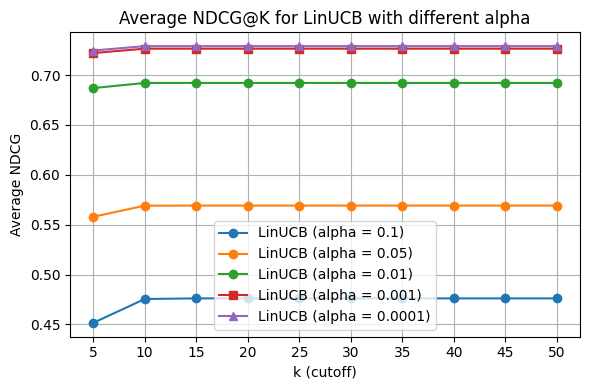

In [20]:
import matplotlib.pyplot as plt

# === Plotting ===
plt.figure(figsize=(6, 4))
plt.plot(k_list, results_linucb_a1_list, marker='o', label='LinUCB (alpha = 0.1)')
plt.plot(k_list, results_linucb_a05_list, marker='o', label='LinUCB (alpha = 0.05)')
plt.plot(k_list, results_linucb_a01_list, marker='o', label='LinUCB (alpha = 0.01)')
plt.plot(k_list, results_linucb_a2_list, marker='s', label='LinUCB (alpha = 0.001)')
plt.plot(k_list, results_linucb_a3_list, marker='^', label='LinUCB (alpha = 0.0001)')
plt.title('Average NDCG@K for LinUCB with different alpha')
plt.xlabel('k (cutoff)')
plt.ylabel('Average NDCG')
plt.xticks(k_list)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# # Testing the LinUCB (alpha=0.1)
# results_linucb_a1 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a1) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.1) NDCG"))
# print(f"LinUCB (alpha=0.1) Average NDCG@10: {np.mean(results_linucb_a1):.4f}")

In [22]:

# results_linucb_a2 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a2) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.001) NDCG"))
# print(f"LinUCB (alpha=0.001) Average NDCG@10: {np.mean(results_linucb_a2):.4f}")

In [23]:
# results_linucb_a3 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a3) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.0001) NDCG"))
# print(f"LinUCB (alpha=0.001) Average NDCG@10: {np.mean(results_linucb_a3):.4f}")

In [24]:
# def train_linucb(row, model):
#     user_id = row.user_id
#     item_id = row.item_id
#     rating = row.rating
#     # user_id = row['user_id']
#     # item_id = row['item_id']

#     user_features = user.loc[user['user_id'] == user_id]
#     user_features = user_features.drop('user_id', axis=1)

#     movie_row = movie.loc[movie['item_id'] == item_id]
#     movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

#     context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

#     reward = rating/5

#     cluster = movie_row["cluster"].values[0]

#     model.update(cluster, context, reward)

In [25]:
# # Training new LinUCB (alpha=0.1)
# linucb_a1 = LinUCB(num_arms, context_dim, 0.1)
# results = Parallel(n_jobs=-1)(delayed(train_linucb)(row, linucb_a1) for row in tqdm(training_df.itertuples(index=False), total=len(training_df), desc="Parallel Training"))

In [26]:
# # Testing the LinUCB (alpha=0.1)
# results_linucb_a1 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a1) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.1) NDCG"))
# print(f"LinUCB (alpha=0.1) Average NDCG@10: {np.mean(results_linucb_a1):.4f}")

In [27]:
# # Training new LinUCB (alpha=0.1)
# linucb_a2 = LinUCB(num_arms, context_dim, 0.001)
# results = Parallel(n_jobs=-1)(delayed(train_linucb)(row, linucb_a2) for row in tqdm(training_df.itertuples(index=False), total=len(training_df), desc="Parallel Training"))

In [28]:
# linucb_a2 = LinUCB(num_arms, context_dim, 0.001)

# # Training
# for idx, row in training_df.iterrows():
#   user_id = row['user_id']
#   item_id = row['item_id']

#   user_features = user.loc[user['user_id'] == user_id]
#   user_features = user_features.drop('user_id', axis=1)

#   movie_row = movie.loc[movie['item_id'] == item_id]
#   movie_features = movie_row.drop(['item_id', 'cluster'], axis=1)

#   context = np.concatenate((user_features.values.flatten(), movie_features.values.flatten()))

#   reward = row['rating']/5

#   cluster = movie_row["cluster"].values[0]

#   linucb_a1.update(cluster, context, reward)

In [29]:
# # Testing the LinUCB (alpha=0.001)
# results_linucb_a2 = Parallel(n_jobs=-1)(delayed(calculate_ndcg)(row, linucb_a2) for row in tqdm(testing_df.itertuples(index=False), total=len(testing_df), desc="LinUCB (alpha=0.001) NDCG"))
# print(f"LinUCB (alpha=0.001) Average NDCG@10: {np.mean(results_linucb_a2):.4f}")

## Optional

In [30]:
all_predicted_scores = []

for row in testing_df.itertuples(index=False):
    user_id = row.user_id
    item_id = row.item_id

    user_features = user.loc[user['user_id'] == user_id].drop('user_id', axis=1)
    movie_row = movie.loc[movie['item_id'] == item_id].drop(['item_id', 'cluster'], axis=1)
    
    context = np.concatenate((user_features.values.flatten(), movie_row.values.flatten()))

    # You can choose to collect max score, all scores, or specific arm score
    scores = [linucb.score(i, context) for i in range(linucb.n_arms)]
    max_score = max(scores)

    all_predicted_scores.append(max_score)


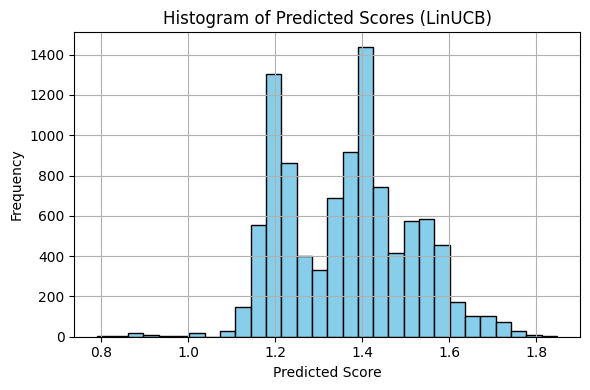

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(all_predicted_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Scores (LinUCB)')
plt.xlabel('Predicted Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


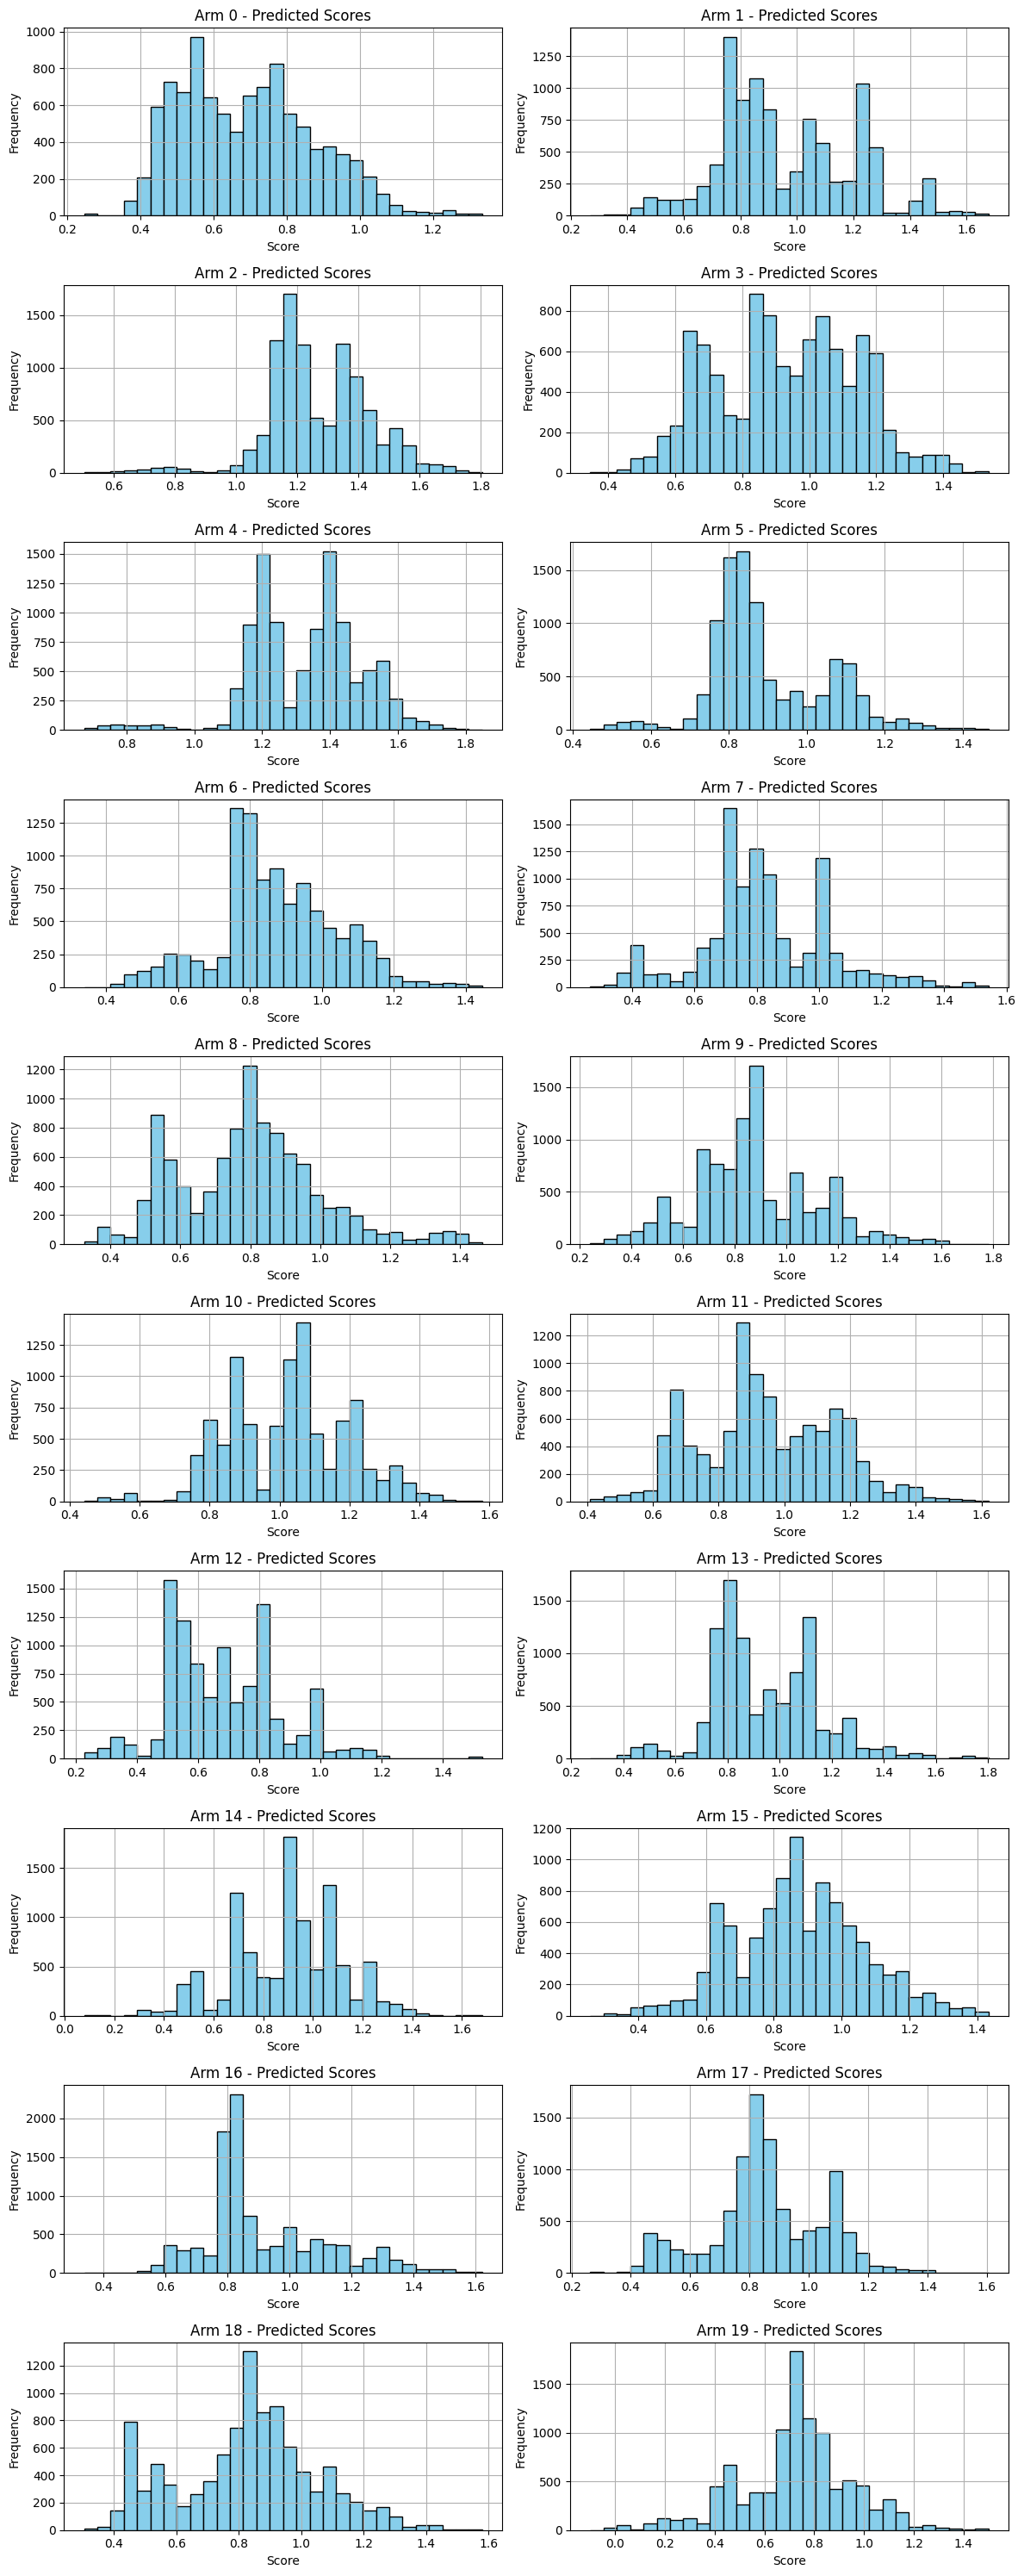

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare storage for each arm's scores
arm_scores_dict = {arm: [] for arm in range(linucb.n_arms)}

# Step 2: Loop through test data and collect predicted scores per arm
for row in testing_df.itertuples(index=False):
    user_id = row.user_id
    item_id = row.item_id

    # Get user and item feature vectors
    user_features = user.loc[user['user_id'] == user_id].drop('user_id', axis=1)
    movie_row = movie.loc[movie['item_id'] == item_id].drop(['item_id', 'cluster'], axis=1)
    context = np.concatenate((user_features.values.flatten(), movie_row.values.flatten()))

    # Score each arm and store
    for arm in range(linucb.n_arms):
        score = linucb.score(arm, context)
        arm_scores_dict[arm].append(score)

# Step 3: Plot histograms for each arm in subplots
num_arms = linucb.n_arms
cols = 2
rows = (num_arms + 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 3))
axs = axs.flatten()  # To simplify indexing

for arm in range(num_arms):
    axs[arm].hist(arm_scores_dict[arm], bins=30, color='skyblue', edgecolor='black')
    axs[arm].set_title(f'Arm {arm} - Predicted Scores')
    axs[arm].set_xlabel('Score')
    axs[arm].set_ylabel('Frequency')
    axs[arm].grid(True)

# Remove any extra empty subplots
for i in range(num_arms, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()
